# Housing data

## Objective
The goal of this lab exercise is to practice performing EDA. If you look in `plot.py` you will find all the functions you need until we get to feature importance. For that, copy/pasta from `selection.ipynb`. (Except it won't work. Why not? Can you figure it out from the error message?)

Spearman's rho is a statistic that measures the monotonicity of the correlation between two variables. Spearman's rho is 1 if whenever X increases, Y also increases and is -1 if whenever X increases than Y decreases. This is not to be confused with Pearson's rho, which measures the linearity of the correlation. Pearson's rho is 1 if whenever X increases, Y increases as a constant multiple of that amount.

It is a fact of history that both Pearson and Spearman developed these statistics in order to "validate" their racism. Agree or disagree, we have been having a conversation as a culture about "canceling" artists. What does that conversation look like when applied to science / scientists?

Steps:

  1. Load the data. Look at the df head to make sure it loaded
  2. Do a violinplot of all the features
  3. Do scatter plots of all the features against each other
  4. Pick three or four features that look correlated or anti-correlated and plot them by themselves. You may have to threshold one of them in order to see anything. You can use the violinplots to find reasonable cutoffs. You can also try a higher order fit curve.
  5. Pick three or four features whose histograms seem interesting. You may have to threshold them in order to see anything interesting. Again, use the violinplots. If you want you can also view a normal distribution overlayed on top.
  6. Draw a horizontal bar chart of the estimated feature importance from a Random Forest model. Don't split the data. We aren't making predictions.

In [28]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import plot

In [29]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target
# Print the first 5 rows of the dataframe
# does it look like data?
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
numerical_df = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"]]

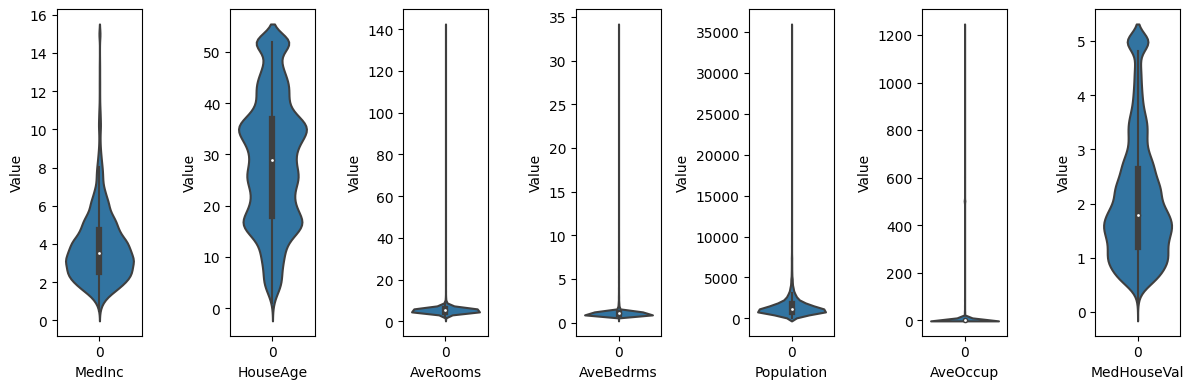

In [4]:
plot.draw_violinplots(numerical_df)

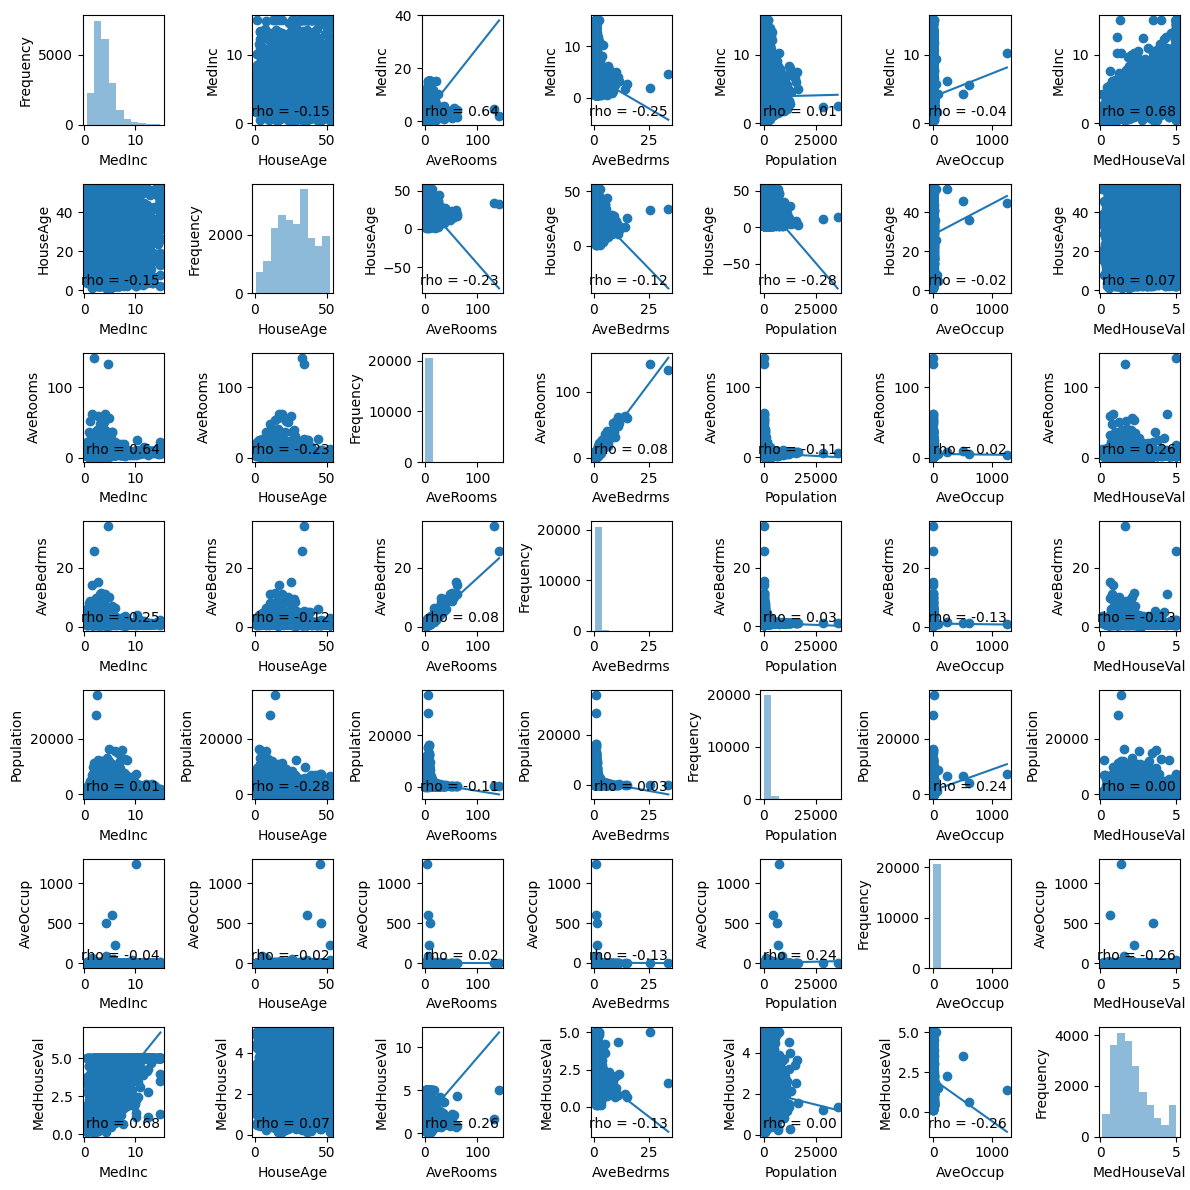

In [5]:
plot.compare_all(numerical_df)

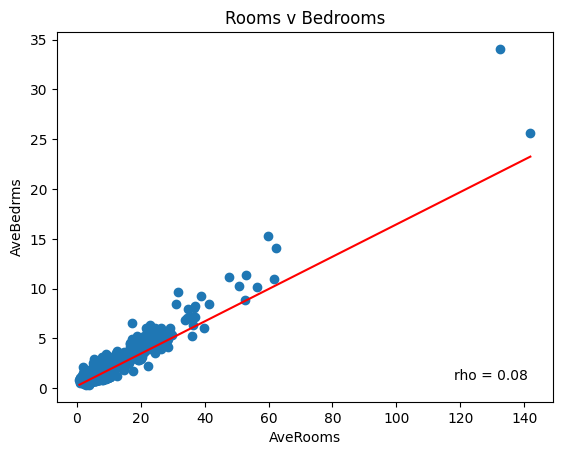

In [6]:
plot.compare_one(df["AveRooms"], df["AveBedrms"], "AveRooms", "AveBedrms", "Rooms v Bedrooms")

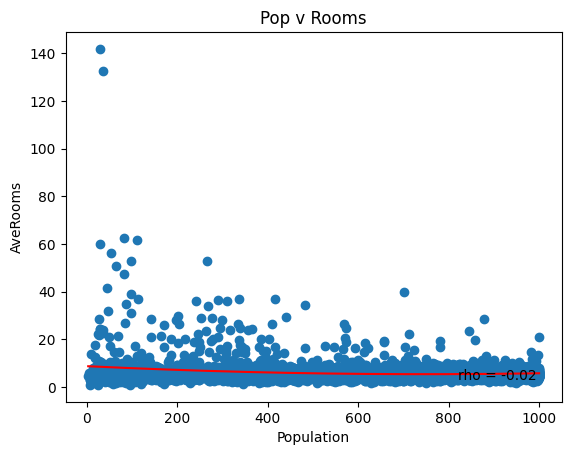

In [7]:
pop_thresh, ave_rooms_thresh = plot.apply_cutoff(df["Population"], df["AveRooms"], 1000)
plot.compare_one(pop_thresh, ave_rooms_thresh, "Population", "AveRooms", "Pop v Rooms", deg=2)

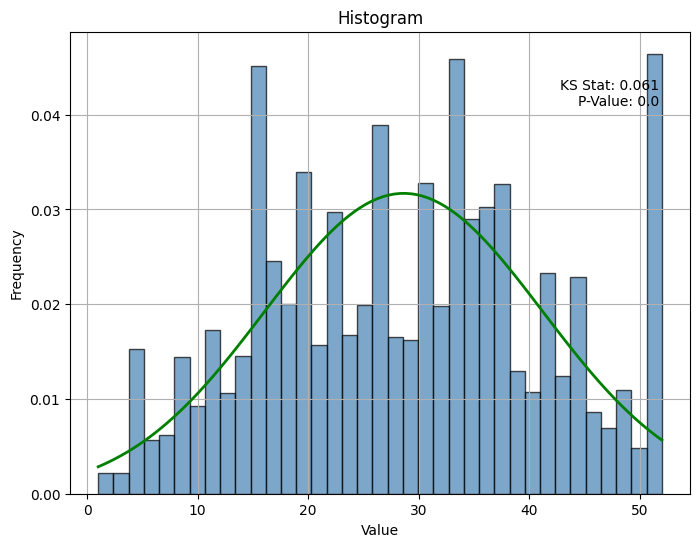

In [8]:
plot.plot_histogram(df["HouseAge"], draw_normal=True)

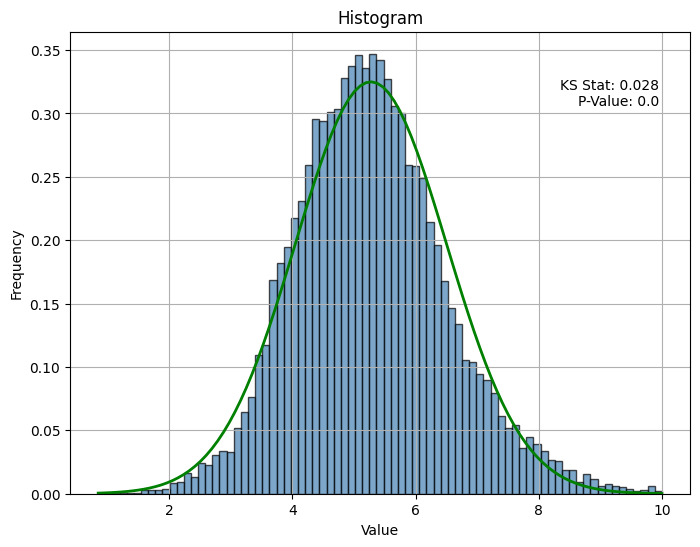

In [9]:
plot.plot_histogram(df["AveRooms"], cutoff=10, draw_normal=True)

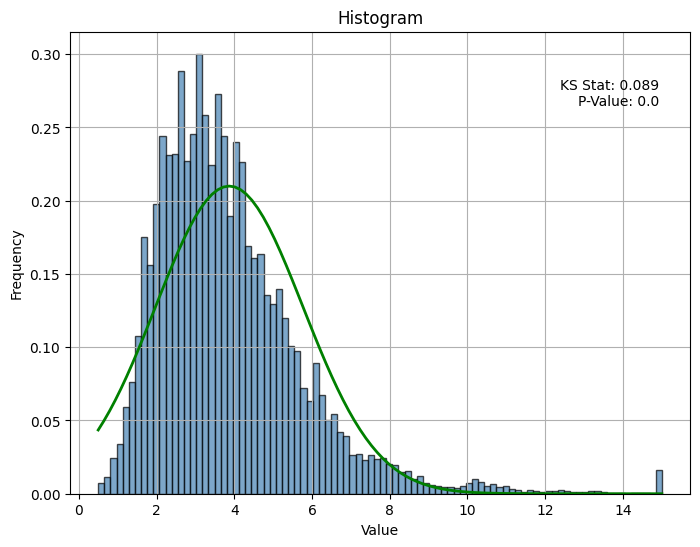

In [10]:
plot.plot_histogram(df["MedInc"], draw_normal=True)

In [19]:
X = housing.data
y = housing.target
feature_names = housing.feature_names

In [15]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

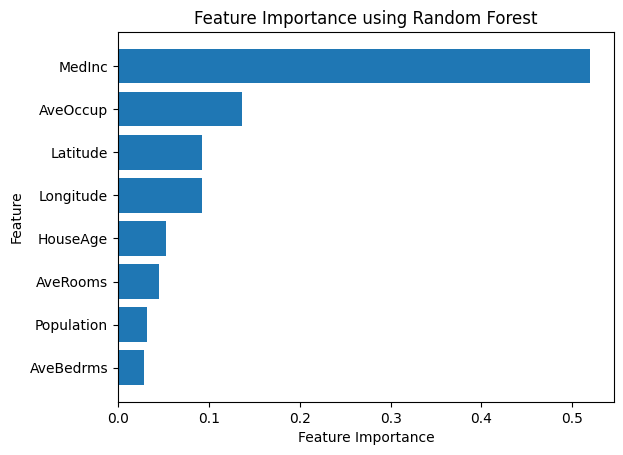

In [22]:
# Compute feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure()
plt.barh(range(X.data.shape[1]), importances[indices], align='center')
plt.yticks(range(X.data.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.show()